## Task2 -- Prediction using Unsupervised ML

## Name -- Adarsh Sharma

In [2]:
# Importing the required Libraries for this Task
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings("ignore")

### Load The Data  and preparing it ......

1. Load data
2. Take a Look on features  of the dataset
3. Create a Dataframe of Iris Data

In [4]:
iris = load_iris()


In [5]:
iris['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
iris['target'][:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data = pd.DataFrame(data = np.c_[iris['data'],iris['target']],columns = iris['feature_names']+['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Let's check missing values in the data

In [ ]:
data.apply(lambda x:sum(x.isnull()))

### Using the Elbow Method 
###### The elbow method is used to find optimum number of cluster for kmeans 

~~ Its the method which help us to find how many cluster we must have to required ... 

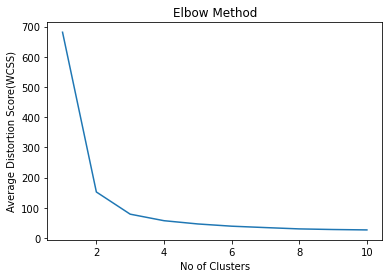

In [14]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(iris['data'])
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('Average Distortion Score(WCSS)')
plt.show()

#### From the Above Graph we get elbow Point is 3
## Hence our required optimum no. of cluster is 3

#### Applying K-means model 

Here we create K-means classifier and also find the centroids 

In [16]:
# fitting Iris data
model = KMeans(n_clusters = 3)
model.fit(iris['data'])

KMeans(n_clusters=3)

In [17]:
# Predictions
data.target = model.labels_

In [18]:
df1 = data[data.target == 0] # collecting all features whose target =  0
df2 = data[data.target == 1] # collecting all features whose target =  1
df3 = data[data.target == 2] # collecting all features whose target =  2


In [19]:
# centroid
model.cluster_centers_ 

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

column 0 , 1 and 3 , 4 are for 'sepal_length Vs Sepal_width' and 'petal_length Vs Petal_width' respectively....

### Plotting Data of Iris Dataset 

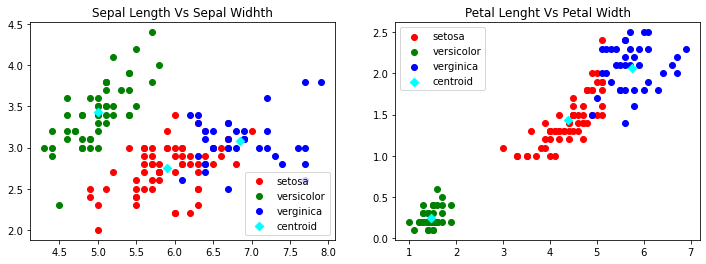

In [23]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.scatter(df1[['sepal length (cm)']],df1[['sepal width (cm)']],color='red',label = 'setosa')
plt.scatter(df2[['sepal length (cm)']],df2[['sepal width (cm)']],color='green',label = 'versicolor')
plt.scatter(df3[['sepal length (cm)']],df3[['sepal width (cm)']],color='blue',label = 'verginica')
plt.scatter(model.cluster_centers_[:,[0]],model.cluster_centers_[:,[1]],color='cyan',label = 'centroid',marker ='D')
plt.title('Sepal Length Vs Sepal Widhth')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(df1[['petal length (cm)']],df1[['petal width (cm)']],color='red',label = 'setosa')
plt.scatter(df2[['petal length (cm)']],df2[['petal width (cm)']],color='green',label = 'versicolor')
plt.scatter(df3[['petal length (cm)']],df3[['petal width (cm)']],color='blue',label = 'verginica')
plt.scatter(model.cluster_centers_[:,[2]],model.cluster_centers_[:,[3]],color='cyan',label = 'centroid',marker ='D')
plt.title('Petal Lenght Vs Petal Width')
plt.legend()

##### From the above graph we can see setosa verginica are overlapping
#  
##### We will try to create a new and clear graph using PCA
#  
## Principal Component Analysis (PCA) Method
    1. PCA Keeps only those feature that are most important in predicting the target
    2. PCA is a feature ectractiom method  where we createnew independent features from the old features
    


In [24]:
pca = PCA(n_components = 2)
xp  = pca.fit_transform(iris['data'])
df4 = pd.DataFrame(xp,columns = ['principal0','principal1'])
df4['target'] = model.labels_
df4.head()

,principal0,principal1,target
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1


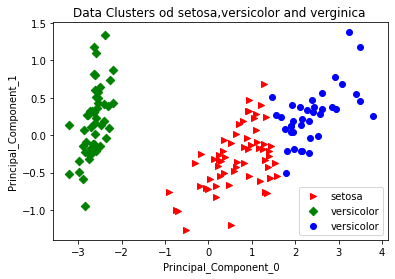

In [25]:
df1 = df4[df4.target == 0]
df2 = df4[df4.target == 1]
df3 = df4[df4.target == 2]

plt.scatter(df1.principal0,df1.principal1,color ='red',label = 'setosa',marker = '>')
plt.scatter(df2.principal0,df2.principal1,color ='green',label = 'versicolor',marker = 'D')
plt.scatter(df3.principal0,df3.principal1,color ='blue',label = 'versicolor')
plt.xlabel('Principal_Component_0')
plt.ylabel('Principal_Component_1')
plt.title('Data Clusters od setosa,versicolor and verginica ')
plt.legend()